train autoencoder WITHOUT using 1DCNN roi finder

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sys
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
#from PyPDF2 import PdfMerger
from tensorflow.keras.models import load_model
import pp_large_samples as pp

### Load and split data

In [2]:
wireplane = "U"
np.random.seed(77)
path = ('/home/vlian/Workspace/ar39_samples/processed/' +wireplane+'/')

In [3]:
dataset = np.load(path+'adc_5_13.npz', allow_pickle=True)

In [4]:
adc_5_7 = dataset['adc_5_7']
adc_8_10 = dataset['adc_8_10']
adc_11_13 = dataset['adc_11_13']

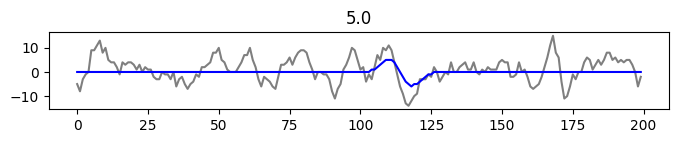

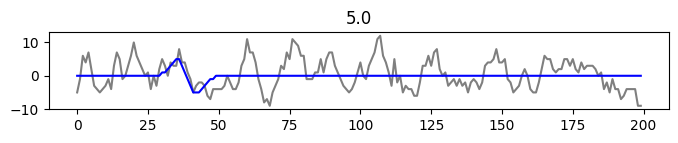

In [5]:
for i in range(2):
    fig = plt.figure(figsize=(8,1))
    plt.title(max(adc_5_7[1][i]))
    plt.plot(adc_5_7[0][i], color='black', alpha=0.5)
    plt.plot(adc_5_7[1][i], color='blue')
    plt.show()

In [6]:
pp.group_num_labels

{0: 'adc_5_7',
 1: 'adc_8_10',
 2: 'adc_11_13',
 3: 'adc_14_16',
 4: 'adc_17_19',
 5: 'adc_20_22',
 6: 'adc_gt_22'}

In [7]:
counts = [len(dataset[pp.group_num_labels[i]][0]) for i in range(3)]

In [8]:
counts

[300000, 300000, 300000]

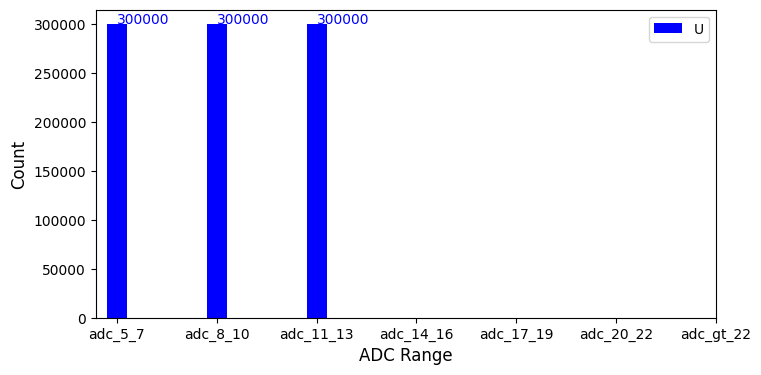

In [9]:
fig = plt.figure(figsize=(8,4))
x_labels = [pp.group_num_labels[i] for i in range(7)]
bar_width = 0.2

plt.bar([i for i in range(len(counts))], counts, width=bar_width, color='blue', label=wireplane)

for i in range(len(counts)):
    dist = 1000
    plt.text(i, counts[i] + dist, counts[i], color='blue', size=10)

plt.xticks([i for i in range(7)], x_labels)
plt.legend()
plt.xlabel('ADC Range', size=12)
plt.ylabel('Count', size=12)
plt.show()

In [10]:
waves_idx = 0
count_idx = 1
x_idx = 0
y_idx= 1

# dataset[waves_idx][adc_group_idx][x_idx]

In [11]:
dataset_to_train_small_adc_x = np.empty((0,200))
dataset_to_train_small_adc_y = np.empty((0, 200))
adc_group_idx = 0
for adc_group_idx in range(len(counts)-1):
    print(adc_group_idx, len(dataset[pp.group_num_labels[adc_group_idx]][x_idx]))
    dataset_to_train_small_adc_x = np.concatenate((dataset_to_train_small_adc_x, dataset[pp.group_num_labels[adc_group_idx]][x_idx]))
    dataset_to_train_small_adc_y = np.concatenate((dataset_to_train_small_adc_y, dataset[pp.group_num_labels[adc_group_idx]][y_idx]))
    print(len(dataset_to_train_small_adc_x), len(dataset_to_train_small_adc_y))

0 300000
300000 300000
1 300000
600000 600000


In [12]:
print(dataset_to_train_small_adc_x.shape, dataset_to_train_small_adc_x.shape)

(600000, 200) (600000, 200)


In [13]:
pp.group_num_labels

{0: 'adc_5_7',
 1: 'adc_8_10',
 2: 'adc_11_13',
 3: 'adc_14_16',
 4: 'adc_17_19',
 5: 'adc_20_22',
 6: 'adc_gt_22'}

In [14]:
dataset_to_train_small_adc_grouping = pp.adc_grouping(dataset_to_train_small_adc_x, dataset_to_train_small_adc_y)

 0: adc_5_7             1: adc_8_10             2: adc_11_13             3: adc_14_16             4: adc_17_19             5: adc_20_22             6: adc_gt_22           

adc_5_7
count       300000

adc_8_10
count       300000

adc_11_13
count       0

adc_14_16
count       0

adc_17_19
count       0

adc_20_22
count       0

adc_gt_22
count       0

     Total:    600000


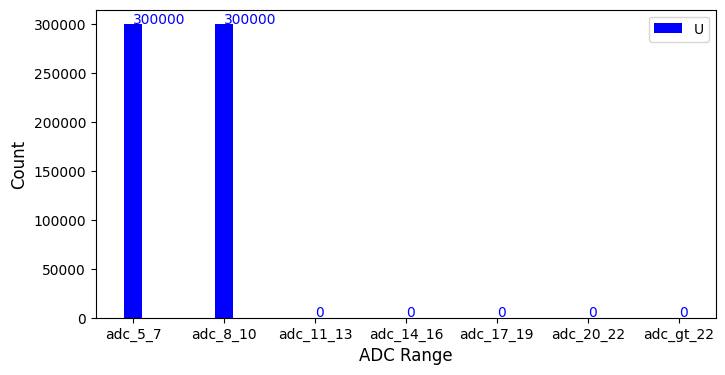

In [15]:
fig = plt.figure(figsize=(8,4))
x_labels = [pp.group_num_labels[i] for i in range(7)]
bar_width = 0.2

plt.bar([i for i in range(7)], dataset_to_train_small_adc_grouping[1], width=bar_width, color='blue', label=wireplane)

for i in range(7):
    dist = 1000
    plt.text(i, dataset_to_train_small_adc_grouping[1][i] + dist, dataset_to_train_small_adc_grouping[1][i], color='blue', size=10)

plt.xticks([i for i in range(7)], x_labels)
plt.legend()
plt.xlabel('ADC Range', size=12)
plt.ylabel('Count', size=12)
plt.show()

In [16]:
print(len(dataset_to_train_small_adc_x), len(dataset_to_train_small_adc_y))

600000 600000


In [17]:
maxes = [max(wave) for wave in dataset_to_train_small_adc_y]

In [18]:
print(min(maxes), max(maxes))

5.0 10.0


### Shuffle dataset

In [19]:
for i in range(50):
    dataset_to_train_small_adc_x, dataset_to_train_small_adc_y = shuffle(dataset_to_train_small_adc_x, dataset_to_train_small_adc_y)

### Split data

In [20]:
dataset_to_train_small_adc_x_train, dataset_to_train_small_adc_x_test, dataset_to_train_small_adc_y_train, dataset_to_train_small_adc_y_test = train_test_split(dataset_to_train_small_adc_x, dataset_to_train_small_adc_y, test_size=0.5, shuffle=True)

In [21]:
print(len(dataset_to_train_small_adc_x_train))

300000


In [ ]:
#HERE

In [22]:
wireplane

'U'

noise_path = '/home/vlian/Workspace/more-noise/'
noise_filenames = sorted([f for f in listdir(noise_path) if (isfile(join(noise_path, f)) and wireplane in f)])### get noise samples

In [23]:
noise_path = '/home/vlian/Workspace/more-noise/U/'
noise_filenames = sorted([f for f in listdir(noise_path) if (isfile(join(noise_path, f)) and wireplane in f)])

In [24]:
combined_noise = np.concatenate([np.load(noise_path+fname, mmap_mode='r') for fname in noise_filenames])

noise_waveforms = pp.get_std_waveforms(combined_noise, 200)
noiseless_waveform = noise_waveforms*0 # for autoencoder

In [25]:
noise_waveforms.shape

(1400000, 200)

In [26]:
noise_waveforms = noise_waveforms[:len(dataset_to_train_small_adc_x_train)*2]
noiseless_waveform = noiseless_waveform[:len(dataset_to_train_small_adc_x_train)*2]


In [27]:
x_noise_train, x_noise_test, y_noise_train, y_noise_test = train_test_split(noise_waveforms, noiseless_waveform, test_size=0.5, shuffle=True)

In [28]:
print(len(x_noise_train), len(x_noise_test))

300000 300000


In [29]:
for i in range(10):
    dataset_to_train_small_adc_x_train, dataset_to_train_small_adc_y_train = shuffle(dataset_to_train_small_adc_x_train, dataset_to_train_small_adc_y_train)
    dataset_to_train_small_adc_x_test, dataset_to_train_small_adc_y_test = shuffle(dataset_to_train_small_adc_x_test, dataset_to_train_small_adc_y_test)
    x_noise_train, y_noise_train = shuffle(x_noise_train, y_noise_train)
    x_noise_test, y_noise_test = shuffle(x_noise_test, y_noise_test)

In [30]:
print(dataset_to_train_small_adc_x_train.shape, x_noise_train.shape)
print(dataset_to_train_small_adc_x_test.shape, x_noise_test.shape)

print(dataset_to_train_small_adc_y_train.shape, y_noise_train.shape)
print(dataset_to_train_small_adc_y_test.shape, y_noise_test.shape)

(300000, 200) (300000, 200)
(300000, 200) (300000, 200)
(300000, 200) (300000, 200)
(300000, 200) (300000, 200)


In [31]:
x_train = np.concatenate((dataset_to_train_small_adc_x_train, x_noise_train))
y_train = np.concatenate((dataset_to_train_small_adc_y_train, y_noise_train))

x_test = np.concatenate((dataset_to_train_small_adc_x_test, x_noise_test))
y_test = np.concatenate((dataset_to_train_small_adc_y_test, y_noise_test))

In [32]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(600000, 200)
(600000, 200)
(600000, 200)
(600000, 200)


In [33]:
for i in range(10):
    x_train, y_train = shuffle(x_train, y_train)
    x_test, y_test = shuffle(x_test, y_test)

In [34]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(600000, 200)
(600000, 200)
(600000, 200)
(600000, 200)


### training validation split

In [35]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=0.2, shuffle=False
)

In [36]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

print(x_valid.shape)
print(y_valid.shape)

(480000, 200)
(480000, 200)
(600000, 200)
(600000, 200)
(120000, 200)
(120000, 200)


In [37]:
train_set = pp.adc_grouping(x_train, y_train)
test_set = pp.adc_grouping(x_test, y_test)
val_set = pp.adc_grouping(x_valid, y_valid)

 0: adc_5_7             1: adc_8_10             2: adc_11_13             3: adc_14_16             4: adc_17_19             5: adc_20_22             6: adc_gt_22           

adc_5_7
count       119520

adc_8_10
count       120328

adc_11_13
count       0

adc_14_16
count       0

adc_17_19
count       0

adc_20_22
count       0

adc_gt_22
count       0

     Total:    239848
 0: adc_5_7             1: adc_8_10             2: adc_11_13             3: adc_14_16             4: adc_17_19             5: adc_20_22             6: adc_gt_22           

adc_5_7
count       150360

adc_8_10
count       149640

adc_11_13
count       0

adc_14_16
count       0

adc_17_19
count       0

adc_20_22
count       0

adc_gt_22
count       0

     Total:    300000
 0: adc_5_7             1: adc_8_10             2: adc_11_13             3: adc_14_16             4: adc_17_19             5: adc_20_22             6: adc_gt_22           

adc_5_7
count       30120

adc_8_10
count       30032

adc_11_13
count   

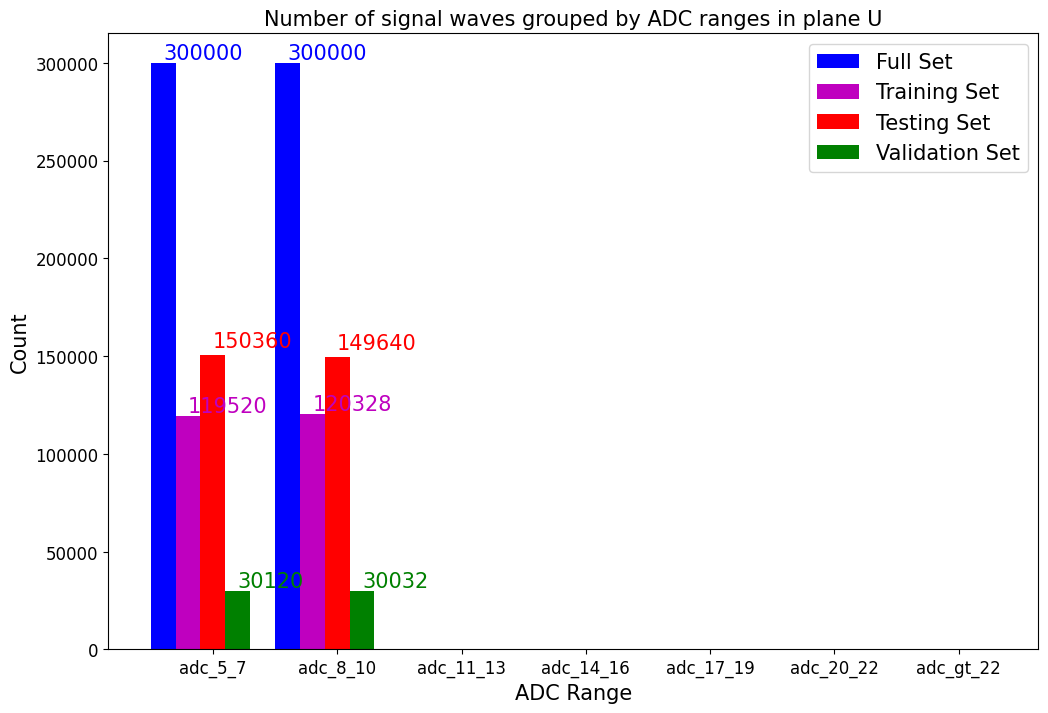

In [51]:
fig = plt.figure(figsize=(12,8))
plt.title('Number of signal waves grouped by ADC ranges in plane ' + wireplane, size=15)

x_labels = [pp.group_num_labels[i] for i in range(7)]
bar_width = 0.2

plt.bar([i - 2*bar_width for i in range(7)], dataset_to_train_small_adc_grouping[1], width=bar_width, color='blue', label='Full Set')
plt.bar([i - bar_width for i in range(7)], train_set[1], width=bar_width, color='m', label='Training Set')
plt.bar([i for i in range(7)], test_set[1], width=bar_width, color='r', label='Testing Set')
plt.bar([i + bar_width for i in range(7)], val_set[1], width=bar_width, color='green', label='Validation Set')

for i in range(2):
    dist = 2000
    plt.text(i - 2*bar_width, dataset_to_train_small_adc_grouping[1][i] + dist, dataset_to_train_small_adc_grouping[1][i], color='blue',size=15)
    plt.text(i - bar_width, train_set[1][i] + dist, train_set[1][i], color='m',size=15)
    plt.text(i, test_set[1][i] + 2*dist, test_set[1][i], color='r',size=15)
    plt.text(i + bar_width, val_set[1][i] + dist, val_set[1][i], color='g',size=15)


plt.xticks([i for i in range(7)], x_labels, size=12)
plt.yticks(size=12)
plt.legend(fontsize=15)
plt.xlabel('ADC Range', size=15)
plt.ylabel('Count', size=15)
plt.show()

In [ ]:
#HERRREEEEEEEEE

In [52]:
mean = x_train.mean()
std = x_train.std()

In [53]:
np.save('./results/low_adc_'+wireplane+'_mean_adc_5_10', mean)
np.save('./results/low_adc_'+wireplane+'_std_adc_5_10', std)
np.save('./results/low_adc_'+wireplane+'_x_train_adc_5_10', x_train)
np.save('./results/low_adc_'+wireplane+'_y_train_adc_5_10', y_train)
np.save('./results/low_adc_'+wireplane+'_x_test_adc_5_10', x_test)
np.save('./results/low_adc_'+wireplane+'_y_test_adc_5_10', y_test)
np.save('./results/low_adc_'+wireplane+'_x_valid_adc_5_10', x_valid)
np.save('./results/low_adc_'+wireplane+'_y_valid_adc_5_10', y_valid)

In [54]:
x_train_scaled = (x_train-mean)/std
x_test_scaled = (x_test-mean)/std
x_valid_scaled = (x_valid-mean)/std

y_train_scaled = (y_train-mean)/std
y_test_scaled = (y_test-mean)/std
y_valid_scaled = (y_valid-mean)/std

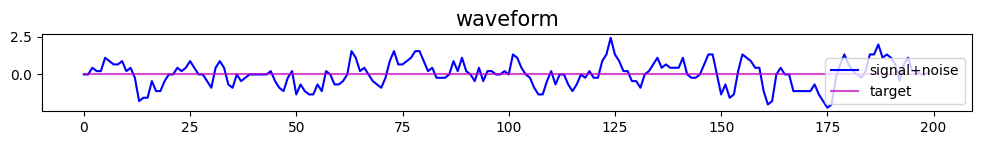

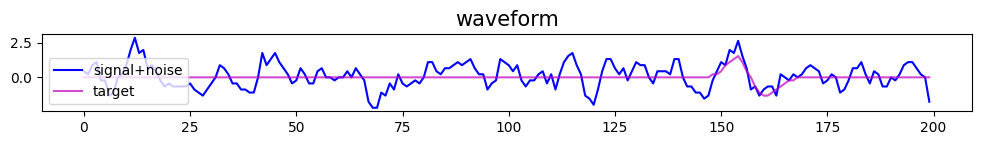

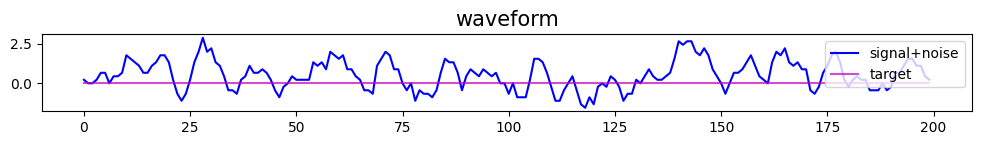

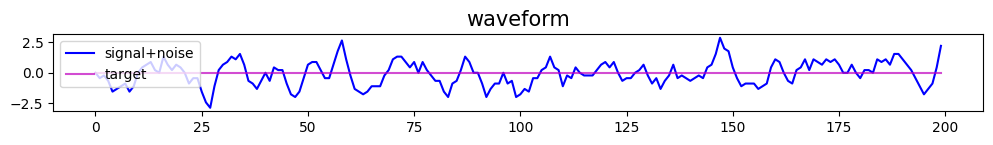

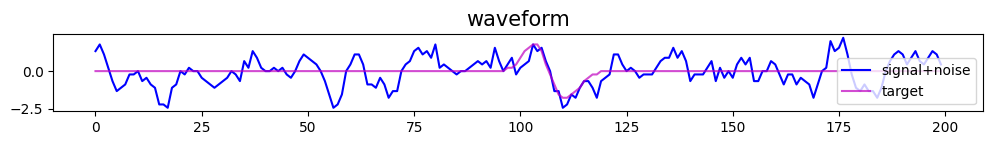

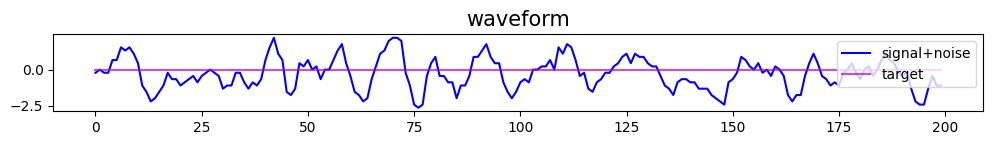

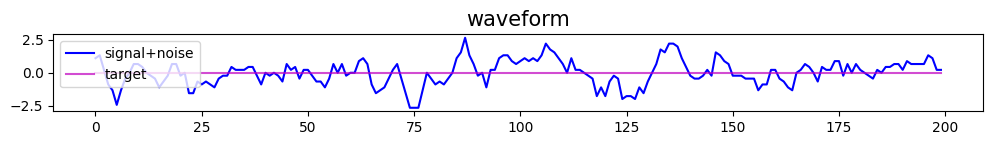

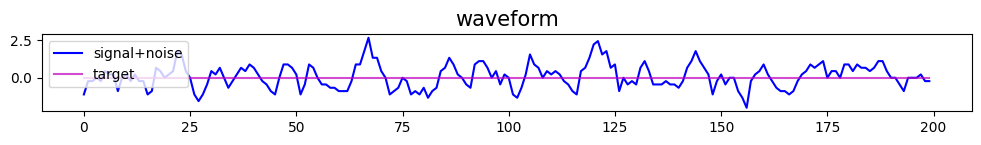

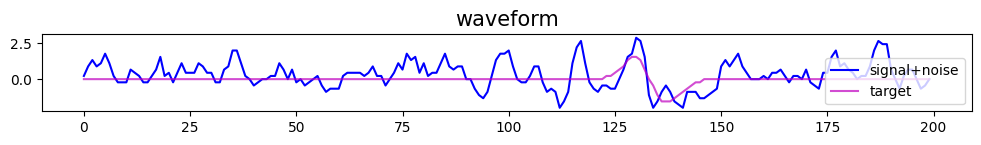

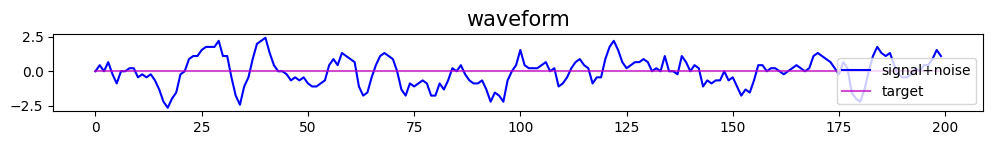

In [55]:
for idx in range(10):
    fig, (ax1) = plt.subplots(figsize=(12, 1), facecolor='white')
    ax1.plot(x_train_scaled[idx],color='blue', label='signal+noise')
    ax1.plot(y_train_scaled[idx],color='m',alpha=0.7, label='target')
    ax1.set_title("waveform", fontsize=15)
    ax1.legend()

    plt.show()

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dropout, Dense,Flatten, AveragePooling1D
from tensorflow.keras.layers import Input,  UpSampling1D
from tensorflow.keras.models import Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, \
    Dropout, Dense,Flatten, AveragePooling1D, BatchNormalization
#from keras import backend as K

In [57]:
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv1DTranspose

In [58]:
time_periods = 200
autoencoder = Sequential()
# encoder
autoencoder.add(Conv1D(filters=16, kernel_size=3, padding="same", strides=2, activation = "relu", input_shape=(time_periods,1)))
autoencoder.add(Conv1D(filters=32, kernel_size=5, padding="same", strides=4, activation = "relu"))
autoencoder.add(Conv1D(filters=64, kernel_size=9, padding="same", strides=5, activation = "relu"))

# decoder
autoencoder.add(Conv1DTranspose(filters=64, kernel_size=9, padding="same", strides=5, activation = "relu"))
autoencoder.add(Conv1DTranspose(filters=32, kernel_size=5, padding="same", strides=4, activation = "relu"))
autoencoder.add(Conv1DTranspose(filters=16, kernel_size=3, padding="same", strides=2, activation = "relu"))

autoencoder.add(Conv1DTranspose(filters=1, kernel_size=3, padding="same"))

autoencoder.compile(loss='mse', optimizer='adam')


In [59]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 100, 16)           64        
                                                                 
 conv1d_1 (Conv1D)           (None, 25, 32)            2592      
                                                                 
 conv1d_2 (Conv1D)           (None, 5, 64)             18496     
                                                                 
 conv1d_transpose (Conv1DTra  (None, 25, 64)           36928     
 nspose)                                                         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 100, 32)          10272     
 ranspose)                                                       
                                                                 
 conv1d_transpose_2 (Conv1DT  (None, 200, 16)          1

In [60]:
for i,layer in enumerate(autoencoder.layers):                                      
    print(i,layer.name)

0 conv1d
1 conv1d_1
2 conv1d_2
3 conv1d_transpose
4 conv1d_transpose_1
5 conv1d_transpose_2
6 conv1d_transpose_3


In [61]:
earlystop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [62]:
%who

AveragePooling1D	 BatchNormalization	 ColumnTransformer	 Conv1D	 Conv1DTranspose	 Dense	 Dropout	 Flatten	 GlobalAveragePooling1D	 
GlobalMaxPooling1D	 Input	 MaxPooling1D	 Model	 Reshape	 Sequential	 StandardScaler	 UpSampling1D	 adc_11_13	 
adc_5_7	 adc_8_10	 adc_group_idx	 autoencoder	 ax1	 bar_width	 combined_noise	 count_idx	 counts	 
dataset	 dataset_to_train_small_adc_grouping	 dataset_to_train_small_adc_x	 dataset_to_train_small_adc_x_test	 dataset_to_train_small_adc_x_train	 dataset_to_train_small_adc_y	 dataset_to_train_small_adc_y_test	 dataset_to_train_small_adc_y_train	 dist	 
earlystop	 fig	 i	 idx	 isfile	 join	 keras	 layer	 listdir	 
load_model	 make_column_transformer	 maxes	 mean	 noise_filenames	 noise_path	 noise_waveforms	 noiseless_waveform	 np	 
os	 path	 pd	 plt	 pp	 shuffle	 std	 sys	 test_set	 
tf	 time_periods	 train_set	 train_test_split	 val_set	 waves_idx	 wireplane	 x_idx	 x_labels	 
x_noise_test	 x_noise_train	 x_test	 x_test_scaled	 x_train	 x_train_sc

In [63]:
%who

AveragePooling1D	 BatchNormalization	 ColumnTransformer	 Conv1D	 Conv1DTranspose	 Dense	 Dropout	 Flatten	 GlobalAveragePooling1D	 
GlobalMaxPooling1D	 Input	 MaxPooling1D	 Model	 Reshape	 Sequential	 StandardScaler	 UpSampling1D	 adc_11_13	 
adc_5_7	 adc_8_10	 adc_group_idx	 autoencoder	 ax1	 bar_width	 combined_noise	 count_idx	 counts	 
dataset	 dataset_to_train_small_adc_grouping	 dataset_to_train_small_adc_x	 dataset_to_train_small_adc_x_test	 dataset_to_train_small_adc_x_train	 dataset_to_train_small_adc_y	 dataset_to_train_small_adc_y_test	 dataset_to_train_small_adc_y_train	 dist	 
earlystop	 fig	 i	 idx	 isfile	 join	 keras	 layer	 listdir	 
load_model	 make_column_transformer	 maxes	 mean	 noise_filenames	 noise_path	 noise_waveforms	 noiseless_waveform	 np	 
os	 path	 pd	 plt	 pp	 shuffle	 std	 sys	 test_set	 
tf	 time_periods	 train_set	 train_test_split	 val_set	 waves_idx	 wireplane	 x_idx	 x_labels	 
x_noise_test	 x_noise_train	 x_test	 x_test_scaled	 x_train	 x_train_sc

In [64]:
list_ = %who_ls

In [65]:
sum_= 0
for var in list_:
    size_ = sys.getsizeof(var)
    size_in_mb = size_ / (1024 ** 2)
    sum_ =+ sys.getsizeof(size_in_mb)
    #print(sys.getsizeof(var))
sum_

24

In [66]:
batch_size_ = 12800

In [67]:
%%time
history = autoencoder.fit(x_train_scaled,                                                              
            y_train_scaled,                                                            
            batch_size=batch_size_,                                              
            epochs=1000,                                                      
            callbacks= [earlystop], #[NewCallback(alpha)], # callbacks=callbacks_list,
            validation_data=(x_valid_scaled, y_valid_scaled),                                                                      
            verbose=1)

Epoch 1/1000
38/38 [==============================] - 19s 156ms/step - loss: 0.0564 - val_loss: 0.0498
Epoch 2/1000
38/38 [==============================] - 3s 88ms/step - loss: 0.0435 - val_loss: 0.0380
Epoch 3/1000
38/38 [==============================] - 3s 87ms/step - loss: 0.0359 - val_loss: 0.0346
Epoch 4/1000
38/38 [==============================] - 3s 86ms/step - loss: 0.0339 - val_loss: 0.0336
Epoch 5/1000
38/38 [==============================] - 3s 87ms/step - loss: 0.0333 - val_loss: 0.0332
Epoch 6/1000
38/38 [==============================] - 3s 88ms/step - loss: 0.0330 - val_loss: 0.0330
Epoch 7/1000
38/38 [==============================] - 3s 87ms/step - loss: 0.0328 - val_loss: 0.0328
Epoch 8/1000
38/38 [==============================] - 3s 87ms/step - loss: 0.0326 - val_loss: 0.0327
Epoch 9/1000
38/38 [==============================] - 3s 87ms/step - loss: 0.0325 - val_loss: 0.0327
Epoch 10/1000
38/38 [==============================] - 3s 92ms/step - loss: 0.0325 - val_

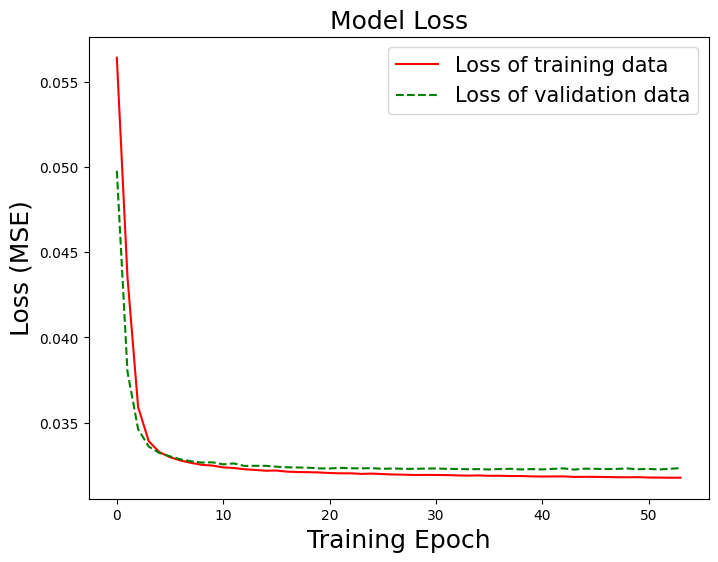

In [69]:
plt.figure(figsize=(8, 6))
s = 18
plt.plot(history.history['loss'], "r", label="Loss of training data", antialiased=True)
plt.plot(history.history['val_loss'], "g--", label="Loss of validation data", antialiased=True)
plt.title('Model Loss',fontsize=s)                                            
plt.ylabel('Loss (MSE)', fontsize=s)                                                 
plt.xlabel('Training Epoch', fontsize=s)                                                                                                                       
plt.legend(fontsize=15)                                                                    
plt.show()     

In [ ]:
# HEREEEEEEEEEEEEEEEEEEE 5:47

In [70]:
#del x_train

import gc
gc.collect()

30293

In [71]:
autoencoder.save('./models/model_AE_'+str(batch_size_)+'_low_ADC_5_10' + wireplane + 'plane_nu.h5')

In [72]:
autoencoder.evaluate(x_test_scaled, y_test_scaled, batch_size=4096)

147/147 [==============================] - 3s 15ms/step - loss: 0.0321


0.03211914002895355

In [73]:
autoencoder.evaluate(x_train_scaled, y_train_scaled, batch_size=4096)

118/118 [==============================] - 2s 15ms/step - loss: 0.0318


0.03177184984087944

In [74]:
autoencoder.evaluate(x_valid_scaled, y_valid_scaled, batch_size=4096)

30/30 [==============================] - 1s 20ms/step - loss: 0.0322


0.032246485352516174

In [75]:
#ae128 = load_model('./AE_models/model_AE_'+str(batch_size_)+'_mse' + wireplane + 'plane_nu.h5')

In [76]:
%%time
predictions = autoencoder.predict(x_test_scaled, batch_size=4096)
predictions = predictions.reshape(predictions.shape[0], predictions.shape[1])



147/147 [==============================] - 2s 12ms/step
CPU times: user 2.38 s, sys: 1 s, total: 3.39 s
Wall time: 3.15 s


In [77]:
from scipy import stats
x_test_ = std*x_test_scaled+mean
y_test_ = y_test_scaled*std + mean


pred = predictions*std + mean

In [78]:
# takes in prediction of AE and for every wave assigns 0 or 1
# 0 --> predicted as noise
# 1 --> pricicted as containing some kind of signals
# note that this is crude and does not consider how close the predicted signal is from truth
def label_predictions(ae_pred_wave):
    label_ = 0
    if max(abs(ae_pred_wave)) > 3:
        label_ = 1
    return label_


def label_truths(wave):
    label_ = 1
    if max(abs(wave)) <= 3:
        label_ = 0
    return label_

In [79]:
pred_labels = [label_predictions(wave) for wave in pred]
truth_labels = [label_truths(t_wave) for t_wave in y_test_]

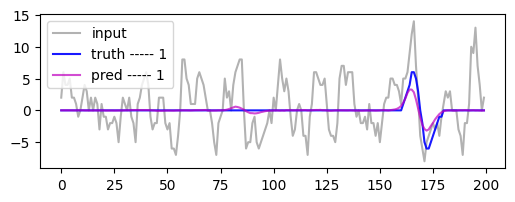

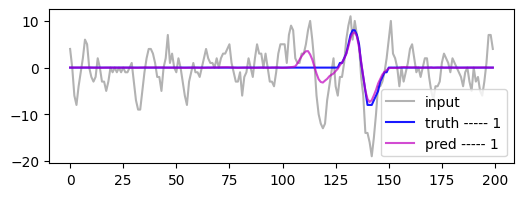

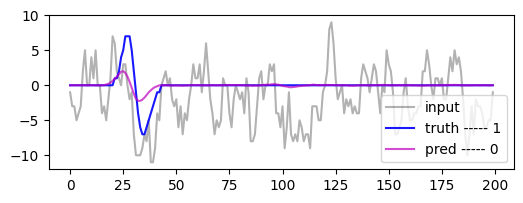

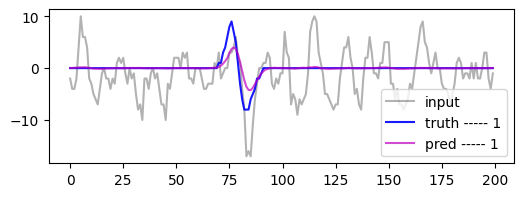

In [80]:
for i in range(70, 77):
    if max(y_test_[i]) < 10 and sum(abs(y_test_[i])) !=0:
        fig = plt.figure(figsize=(6,2))
        plt.plot(x_test_[i], color='black', alpha=0.3, label='input')
        plt.plot(y_test_[i], color='blue', alpha=0.9, label='truth ----- ' + str(truth_labels[i]))
        plt.plot(pred[i], color='m', alpha=0.7, label='pred ----- ' + str(pred_labels[i]))
        plt.legend()
        plt.show()


In [81]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(truth_labels, pred_labels, drop_intermediate=False)
roc_auc = auc(fpr, tpr)


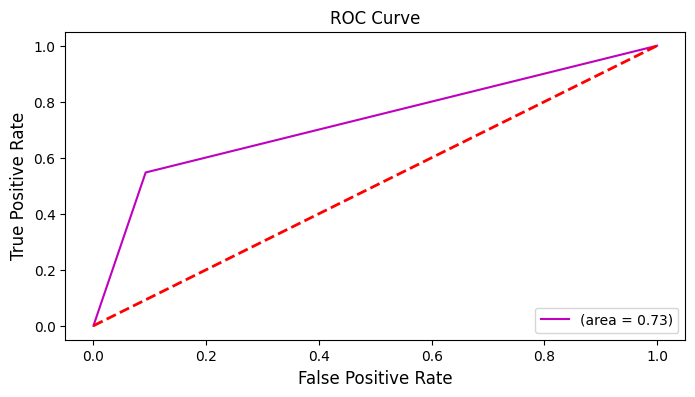

In [82]:
fig = plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='m', label='(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', size=12)
plt.ylabel('True Positive Rate', size=12)
plt.title('ROC Curve', size=12)
plt.legend(loc="lower right")
plt.show()

In [83]:
# dataset_x -> noisy signal waveforms
# dataset_y -> clean signal waveforms
# splits data set into subsets based on ADC ranges
def adc_grouping(dataset_x, dataset_y, pred):
    adc_5_7_x = []
    adc_5_7_y = []
    adc_5_7_p = []

    adc_8_10_x = []
    adc_8_10_y = []
    adc_8_10_p = []

    adc_11_13_x = []
    adc_11_13_y = []
    adc_11_13_p = []

    adc_14_16_x = []
    adc_14_16_y = []
    adc_14_16_p = []

    adc_17_19_x = []
    adc_17_19_y = []
    adc_17_19_p = []

    adc_20_22_x = []
    adc_20_22_y = []
    adc_20_22_p = []

    adc_gt_22_x = []
    adc_gt_22_y = []
    adc_gt_22_p = []

    noise_x = []
    noise_y = []
    noise_p = []

    for i, wave in enumerate(dataset_y):
        max_adc = max(wave)
        if sum(abs(wave)) == 0:
            noise_x.append(x_test_[i])
            noise_y.append(wave)
            noise_p.append(pred[i])
        elif max_adc >= 5 and max_adc <= 7:
            adc_5_7_x.append(dataset_x[i])
            adc_5_7_y.append(wave)
            adc_5_7_p.append(pred[i])

        elif max_adc >= 8 and max_adc <= 10:
            adc_8_10_x.append(dataset_x[i])
            adc_8_10_y.append(wave)
            adc_8_10_p.append(pred[i])
        elif max_adc >= 11 and max_adc <= 13:
            adc_11_13_x.append(dataset_x[i])
            adc_11_13_y.append(wave)
            adc_11_13_p.append(pred[i])
        elif max_adc >= 14 and max_adc <= 16:
            adc_14_16_x.append(dataset_x[i])
            adc_14_16_y.append(wave)
            adc_14_16_p.append(pred[i])
        elif max_adc >= 17 and max_adc <= 19:
            adc_17_19_x.append(dataset_x[i])
            adc_17_19_y.append(wave)
            adc_17_19_p.append(pred[i])
        elif max_adc >= 20 and max_adc <= 22:
            adc_20_22_x.append(dataset_x[i])
            adc_20_22_y.append(wave)
            adc_20_22_p.append(pred[i])
        elif max_adc > 22:
            adc_gt_22_x.append(dataset_x[i])
            adc_gt_22_y.append(wave)
            adc_gt_22_p.append(pred[i])

    grouped_waves = [
                    [adc_5_7_x, adc_5_7_y, adc_5_7_p],
                    [adc_8_10_x, adc_8_10_y, adc_8_10_p],
                    [adc_11_13_x, adc_11_13_y, adc_11_13_p],
                    [adc_14_16_x, adc_14_16_y, adc_14_16_p],
                    [adc_17_19_x, adc_17_19_y, adc_17_19_p],
                    [adc_20_22_x, adc_20_22_y, adc_20_22_p],
                    [adc_gt_22_x, adc_gt_22_y, adc_gt_22_p],
                    [noise_x, noise_y, noise_p]  
                    ]
    print(' 0: adc_5_7 \
            1: adc_8_10 \
            2: adc_11_13 \
            3: adc_14_16 \
            4: adc_17_19 \
            5: adc_20_22 \
            6: adc_gt_22\
            7: noise')
    print()
    

    return grouped_waves

group_num_labels = {
                    0: 'adc_5_7',
                    1: 'adc_8_10',
                    2: 'adc_11_13',
                    3: 'adc_14_16',
                    4: 'adc_17_19',
                    5: 'adc_20_22',
                    6: 'adc_gt_22',
                    7: 'noise'
                    }

# prints summary
def print_counts(data_x, data_y, pred):
    grouped = adc_grouping(data_x, data_y, pred)
    sum_ = 0
    
    res = []
    for i in range(8):
        count = len(grouped[i][0])
        print(group_num_labels[i])
        print('{:<12}{}'.format('count', count))
        print()
        res.append(count)
        if i < 7:
            sum_ += count

    print('{:<15}{}'.format('     signal:', sum_))
    print('{:<15}{}'.format('     noise:', len(grouped[7][0])))
    print('{:<15}{}'.format('     TOTAL', sum_+len(grouped[7][0])))

    return res

In [84]:
grouped_waves = adc_grouping(x_test, y_test, pred)

 0: adc_5_7             1: adc_8_10             2: adc_11_13             3: adc_14_16             4: adc_17_19             5: adc_20_22             6: adc_gt_22            7: noise



In [85]:
print_counts(x_test, y_test, pred)

 0: adc_5_7             1: adc_8_10             2: adc_11_13             3: adc_14_16             4: adc_17_19             5: adc_20_22             6: adc_gt_22            7: noise

adc_5_7
count       150360

adc_8_10
count       149640

adc_11_13
count       0

adc_14_16
count       0

adc_17_19
count       0

adc_20_22
count       0

adc_gt_22
count       0

noise
count       300000

     signal:   300000
     noise:    300000
     TOTAL     600000


[150360, 149640, 0, 0, 0, 0, 0, 300000]

In [86]:
len(grouped_waves[0][0])

150360

In [87]:
len(grouped_waves[0][2])

150360

Rejection rate at each group

In [88]:
def eval_group(group_num):
    if group_num > 4:
        print('arg should be less than 6')
        return -1
    x = grouped_waves[group_num][0]
    y = grouped_waves[group_num][1]
    infer = grouped_waves[group_num][2]

    positive_x = []
    positive_y = []
    positive_p = []

    negative_x = []
    negative_y = []
    negative_p = []

    for i, wave in enumerate(infer):
        if max(wave) > 5:
            positive_x.append(x[i])
            positive_y.append(y[i])
            positive_p.append(wave)
        else:
            negative_x.append(x[i])
            negative_y.append(y[i])
            negative_p.append(wave)
    print(group_num_labels[group_num])
    print('{:<12}{}'.format('Total:', len(x)))
    print('{:<12}{}'.format('True Pos: ', len(positive_x)))
    print('{:<12}{}'.format('False Pos: ', len(negative_x)))
    print()

    return [[positive_x, positive_y, positive_p], [negative_x, negative_y, negative_p]]

In [89]:
for i in range(6):
    eval_group(i)

adc_5_7
Total:      150360
True Pos:   32266
False Pos:  118094

adc_8_10
Total:      149640
True Pos:   81234
False Pos:  68406

adc_11_13
Total:      0
True Pos:   0
False Pos:  0

adc_14_16
Total:      0
True Pos:   0
False Pos:  0

adc_17_19
Total:      0
True Pos:   0
False Pos:  0

arg should be less than 6


In [90]:
len(grouped_waves)

8

In [91]:
noise_p = grouped_waves[7][2]

In [92]:
noise__ = [max(abs(wave)) for wave in noise_p if max(abs(wave)) >= 5]

In [93]:
print('{:<12}{}'.format('Total:', len(grouped_waves[7][0])))
print('{:<12}{}'.format('True Neg: ', len(grouped_waves[7][0]) - len(noise__)))
print('{:<12}{}'.format('False Neg: ', len(noise__)))
print()

Total:      300000
True Neg:   291899
False Neg:  8101



In [94]:
(291647/300000)*100

97.21566666666666

In [95]:
grouped_pred_waves = adc_grouping(pred, y_test, pred)

 0: adc_5_7             1: adc_8_10             2: adc_11_13             3: adc_14_16             4: adc_17_19             5: adc_20_22             6: adc_gt_22            7: noise



In [100]:
def get_num_TP(group_num):
    if group_num > 6:
        print('arg should be less than 6')
        return -1
    y = grouped_pred_waves[group_num][1]
    infer = grouped_pred_waves[group_num][0]

    positive_y = []
    positive_p = []

    negative_y = []
    negative_p = []

    for i, wave in enumerate(infer):
        if max(wave) >= 5:
            positive_y.append(y[i])
            positive_p.append(wave)
        else:
            negative_y.append(y[i])
            negative_p.append(wave)
    print(group_num_labels[group_num])
    print('{:<12}{}'.format('Total:', len(y)))
    print('{:<12}{}'.format('True Pos: ', len(positive_y)))
    print('{:<12}{}'.format('False Pos: ', len(negative_y)))
    print()

    return len(positive_y)

In [101]:
test_set_TP = []
for i in range(7):
    test_set_TP.append(get_num_TP(i))
    

adc_5_7
Total:      150360
True Pos:   32266
False Pos:  118094

adc_8_10
Total:      149640
True Pos:   81234
False Pos:  68406

adc_11_13
Total:      0
True Pos:   0
False Pos:  0

adc_14_16
Total:      0
True Pos:   0
False Pos:  0

adc_17_19
Total:      0
True Pos:   0
False Pos:  0

adc_20_22
Total:      0
True Pos:   0
False Pos:  0

adc_gt_22
Total:      0
True Pos:   0
False Pos:  0



In [103]:
(32266/150360)*100

21.459164671455174